In [55]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [56]:
# Load data
df_train = pd.read_csv("/content/train.csv")
df_test = pd.read_csv("/content/test.csv")


In [57]:
!pip install scikit-learn

In [58]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

In [59]:
unseen_categories = set(df_test[categorical_cols].values.ravel()) - set(df_train[categorical_cols].values.ravel())
print(f"Unseen categories: {unseen_categories}")

Unseen categories: set()


In [60]:
print(unseen_categories)

set()


In [61]:
print(df_test.columns)

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [62]:
print(df_test.isnull().sum())

Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 80, dtype: int64


In [63]:
# Feature engineering (replace with more advanced techniques as needed)
# Handle categorical features
categorical_cols = [col for col in df_train.columns if df_train[col].dtype == 'object']
le = LabelEncoder()
le.fit(df_train[categorical_cols].values.ravel())  # Fit on all categories (including unseen)

def encode_label(col):
  # Encode with le, unseen labels get -1
  return le.transform(col)

df_train[categorical_cols] = df_train[categorical_cols].apply(encode_label)
df_test[categorical_cols] = df_test[categorical_cols].apply(encode_label)


In [64]:
# Handle missing values (replace with more sophisticated methods)
df_train.fillna(df_train.mean(), inplace=True)
df_test.fillna(df_train.mean(), inplace=True)

In [65]:
# Separate features and target variable
X_train = df_train.drop('SalePrice', axis=1)
y_train = df_train['SalePrice']

# Train-Test Split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [66]:
# Random Forest Regression
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)  # Colon added after function definition
y_pred_rf = model_rf.predict(X_val)  # Colon added after function definition
rf_mse = mean_squared_error(y_val, y_pred_rf)
print(f"Random Forest MSE: {rf_mse}")


Random Forest MSE: 788408486.9051509


In [67]:
# Separate features and target variable (drop "Id" consistently)
X_train = df_train.drop(['Id', 'SalePrice'], axis=1)
y_train = df_train['SalePrice']

# Train-Test Split (already done, but ensuring consistency)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
model_rf.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

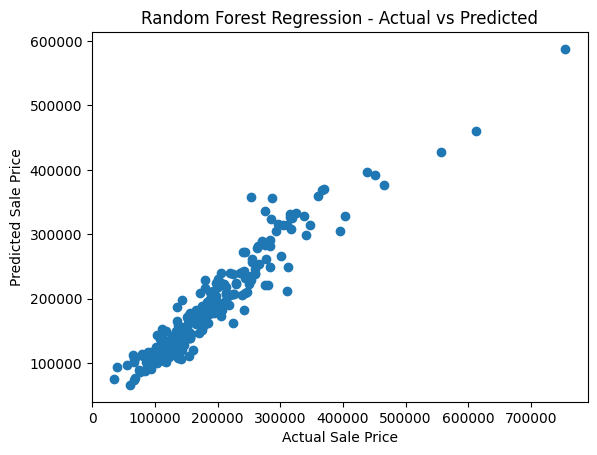

In [68]:
# Scatter plot of actual vs predicted values
plt.scatter(y_val, y_pred_rf)
plt.xlabel("Actual Sale Price")
plt.ylabel("Predicted Sale Price")
plt.title("Random Forest Regression - Actual vs Predicted")
plt.show()

In [69]:
# Prediction on Test Data (assuming model_rf is already trained)
X_test = df_test.drop('Id', axis=1)  # Drop ID as it's not a feature
y_pred_test_rf = model_rf.predict(X_test)

# Create the submission DataFrame
submission_df = pd.DataFrame({'Id': df_test['Id'], 'SalePrice': y_pred_test_rf})

# Save predictions for submission
submission_df.to_csv('submission.csv', index=False)
